In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (10,5)
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.dpi'] = (200)
sns.set_theme(style='darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv('C:\\Users\\Abhishek\\Downloads\\EastWestAirline.csv',encoding='latin1',index_col=0)
df


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [21]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


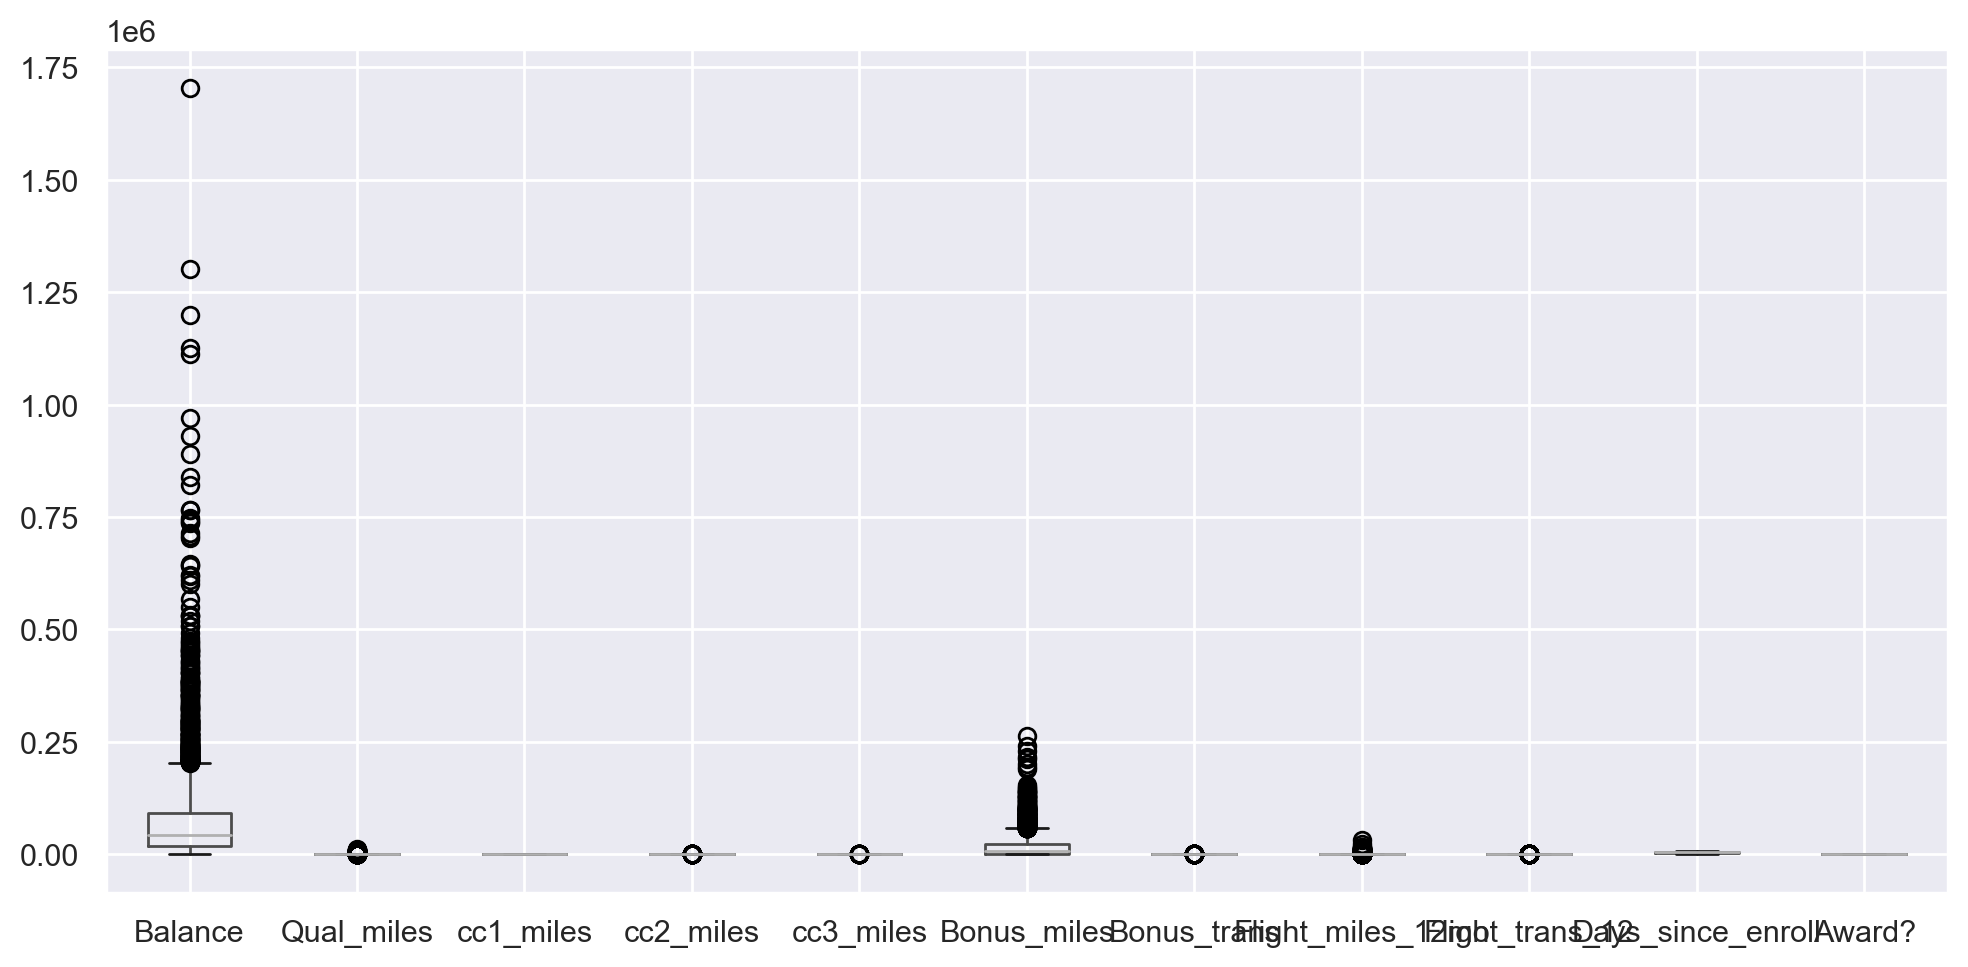

In [23]:
df.boxplot()
plt.tight_layout()

In [24]:
#Reoving the Outliers 

In [25]:
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    upper = q3 +(1.5*iqr)
    lower =q1 + (1.5*iqr)
    
    return upper,lower

In [28]:
outlier_detection(df,'Balance')

(203218.75, 129342.25)

In [29]:
outlier_detection(df,'Bonus_miles')

(57626.25, 35075.75)

In [35]:
outlier_detection(df,'Flight_miles_12mo')

(777.5, 466.5)

In [ ]:
outlier_detection(df,'Flight_trans_12')

In [32]:
df.loc[df['Flight_miles_12mo']>466.5,'Flight_miles_12mo'] = 466.5

In [33]:
df.loc[df['Balance']>129342.25,'Balance'] =129342.25

In [34]:
df.loc[df['Bonus_miles']>35075.75,'Bonus_miles'] =35075.75

In [36]:
df.loc[df['Flight_trans_12']>1.5,'Flight_trans_12'] = 1.5

<Axes: >

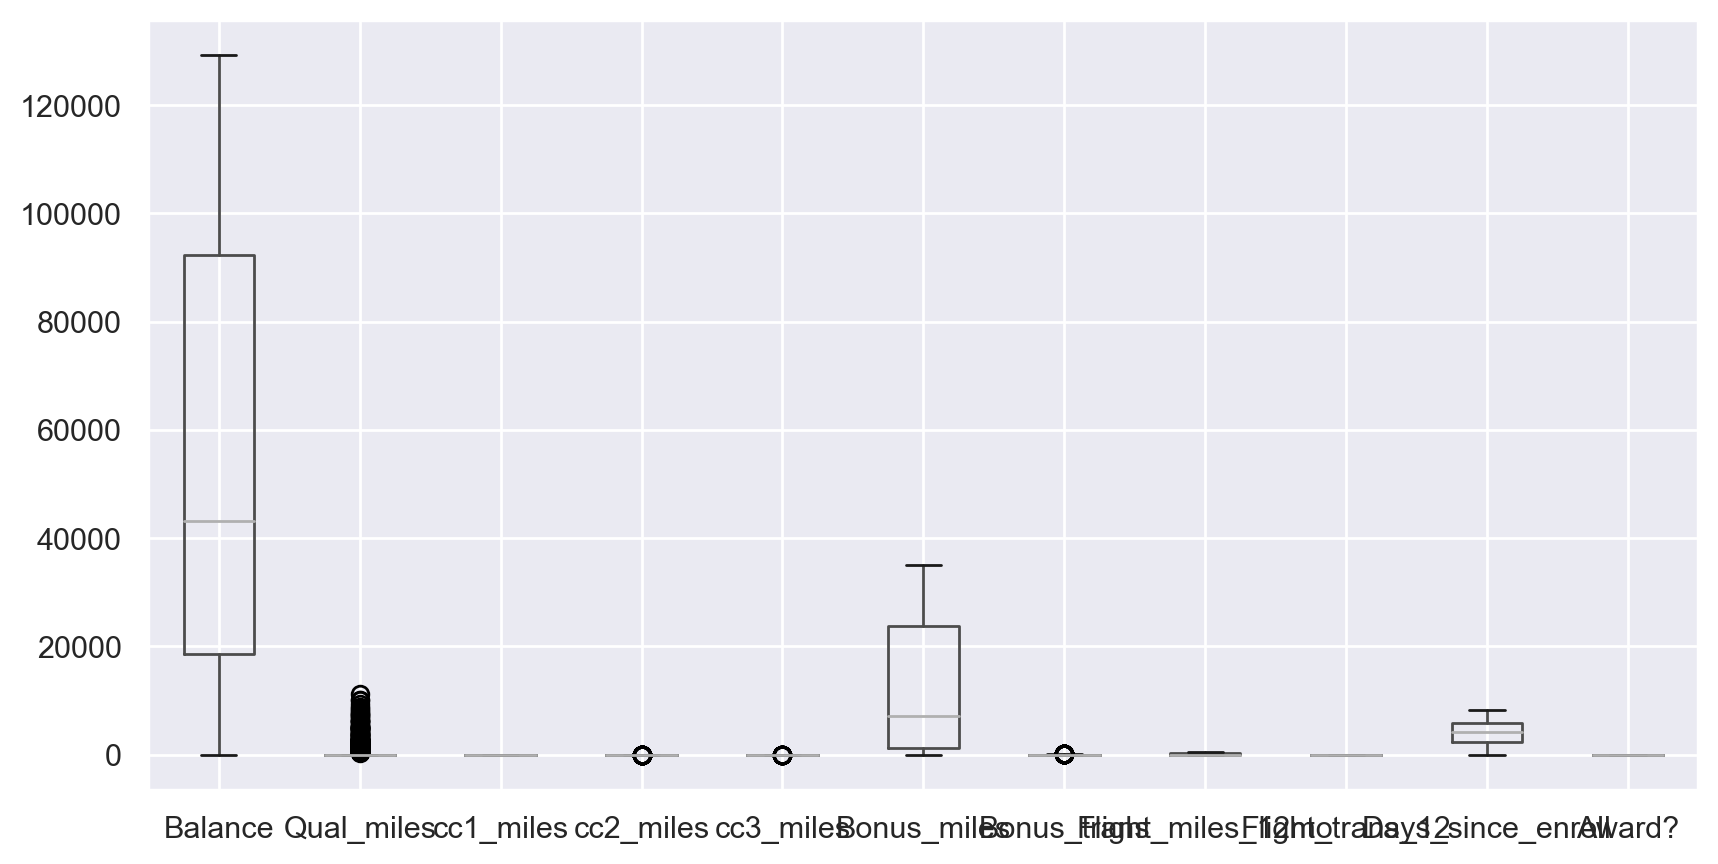

In [37]:
df.boxplot()

In [38]:

df.loc[df['Qual_miles']>0.0,'Qual_miles'] = 0.0

<Axes: >

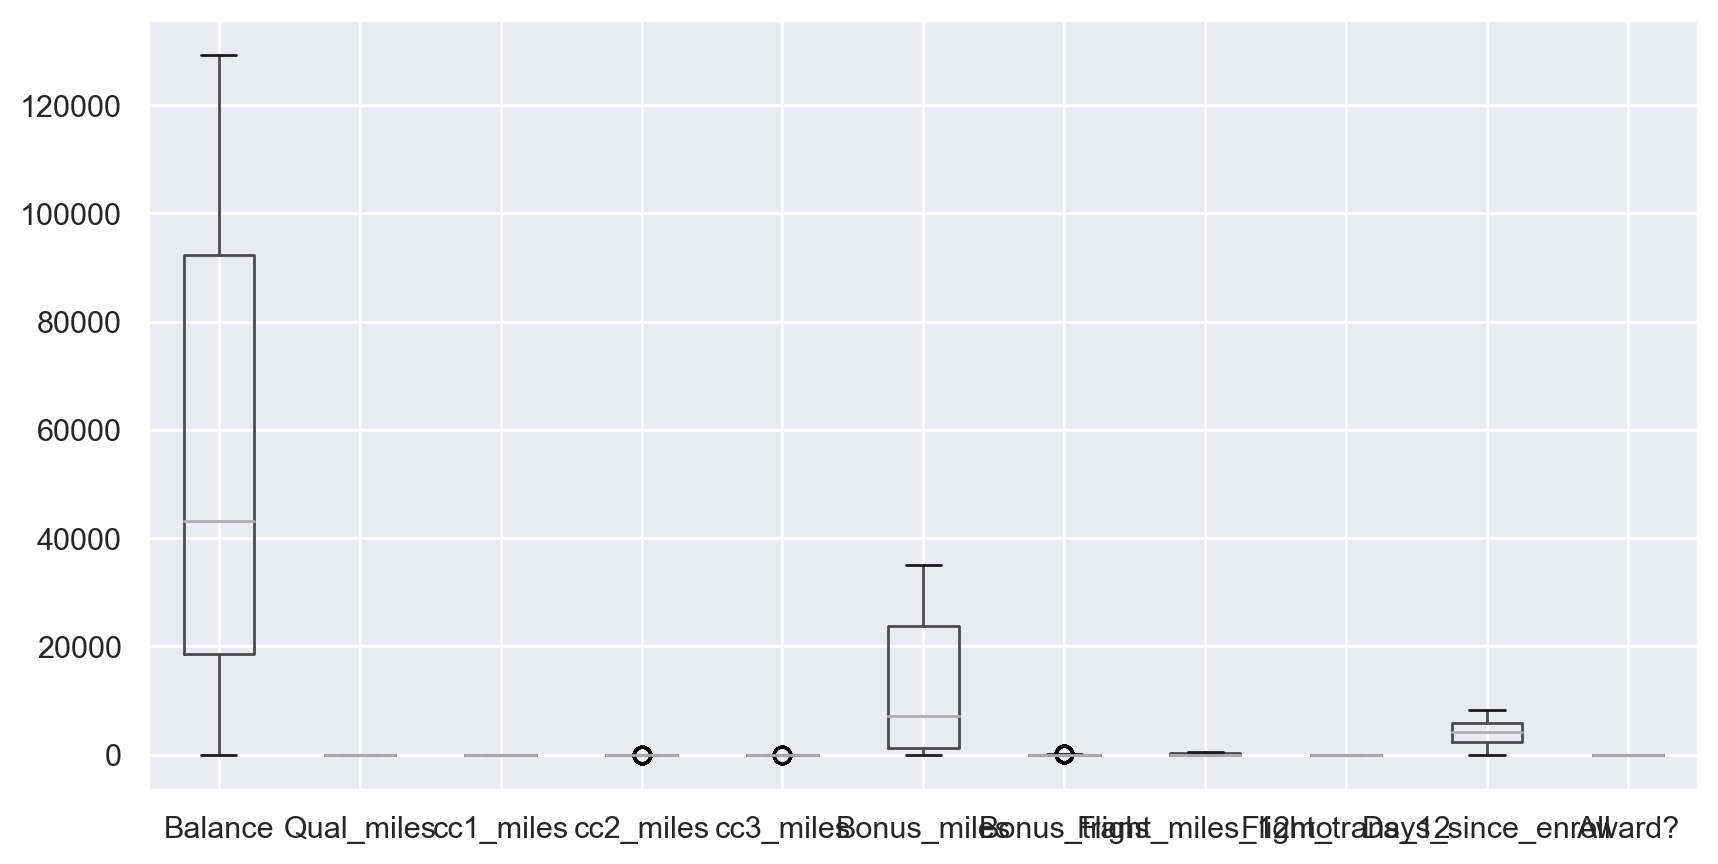

In [39]:
df.boxplot()

In [40]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [41]:
# Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
x = scaling.fit_transform(df)
x
dt = pd.DataFrame(x)
dt.columns = df.columns
dt

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.217586,0.0,0.00,0.0,0.0,0.004961,0.011628,0.000000,0.000000,0.843742,0.0
1,0.148784,0.0,0.00,0.0,0.0,0.006130,0.023256,0.000000,0.000000,0.839884,0.0
2,0.319725,0.0,0.00,0.0,0.0,0.117546,0.046512,0.000000,0.000000,0.847842,0.0
3,0.114240,0.0,0.00,0.0,0.0,0.014255,0.011628,0.000000,0.000000,0.837955,0.0
4,0.755762,0.0,0.75,0.0,0.0,1.000000,0.302326,1.000000,1.000000,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.142846,0.0,0.00,0.0,0.0,0.243045,0.046512,0.428725,0.666667,0.168917,1.0
3995,0.497788,0.0,0.00,0.0,0.0,0.027968,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.569010,0.0,0.50,0.0,0.0,0.725487,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.424448,0.0,0.00,0.0,0.0,0.014255,0.011628,1.000000,0.666667,0.168676,0.0


In [44]:
# Hierachy Cluster

In [45]:
from scipy.cluster import hierarchy as sch

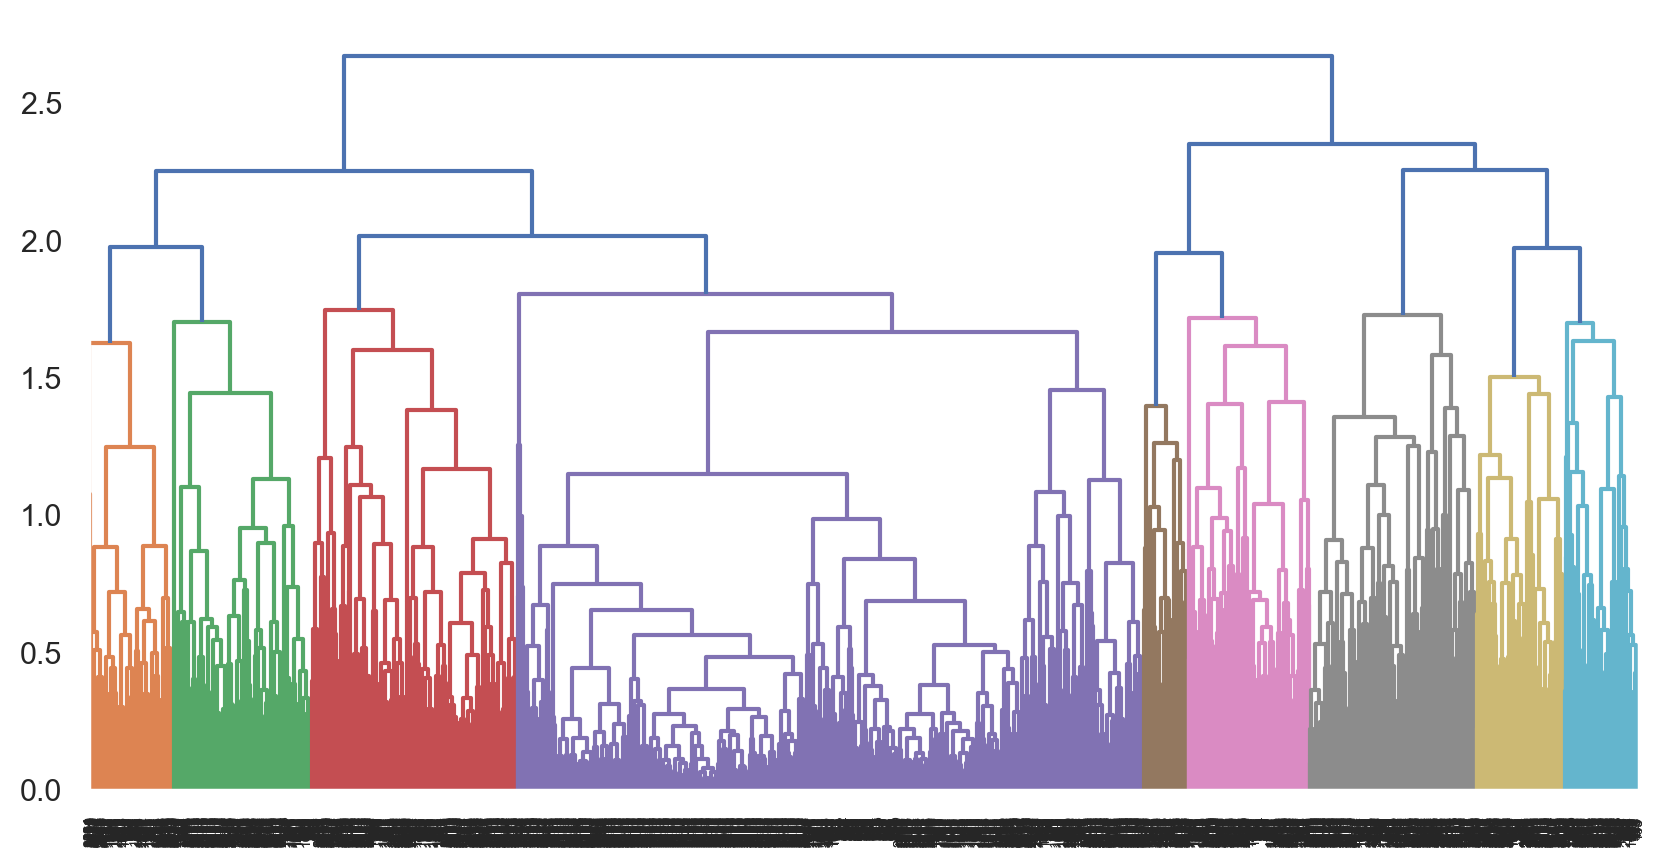

In [49]:
lk = sch.linkage(dt,method='complete')
dendro = sch.dendrogram(lk)
plt.axhline(y=6.5,c='red',linestyle = '--')
plt.show()


In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
hc=AgglomerativeClustering(n_clusters=3)
y= hc.fit_predict(dt)

In [52]:
y

array([0, 0, 0, ..., 2, 1, 0], dtype=int64)

In [53]:
df['Cluster']=y
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
ID#,,,,,,,,,,,,
1,28143.0,0,1,1,1,174.00,1,0.0,0.0,7000,0,0
2,19244.0,0,1,1,1,215.00,2,0.0,0.0,6968,0,0
3,41354.0,0,1,1,1,4123.00,4,0.0,0.0,7034,0,0
4,14776.0,0,1,1,1,500.00,1,0.0,0.0,6952,0,0
5,97752.0,0,4,1,1,35075.75,26,466.5,1.5,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476.0,0,1,1,1,8525.00,4,200.0,1.0,1403,1,1
4018,64385.0,0,1,1,1,981.00,5,0.0,0.0,1395,1,2
4019,73597.0,0,3,1,1,25447.00,8,0.0,0.0,1402,1,2


In [55]:
df['Cluster'].value_counts()

0    1977
1    1272
2     750
Name: Cluster, dtype: int64

In [57]:
df.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,45777.831184,0.0,1.677795,1.016692,1.008093,8315.736596,8.480020,0.379363,0.002276,3768.199798,0.000000
1,74643.497445,0.0,2.290881,1.012579,1.016509,16704.563876,15.514151,396.045597,1.316824,4388.117925,0.574686
2,52410.316000,0.0,2.673333,1.012000,1.016000,18522.225333,13.196000,0.000000,0.000000,4584.936000,1.000000


In [58]:
#KMEANS

In [59]:
from sklearn.cluster import KMeans

In [60]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-0.64220241,  0.        , -0.76957841, ...,  1.39545434,
        -0.7669193 , -0.90413902],
       [-0.84586942,  0.        , -0.76957841, ...,  1.37995704,
        -0.7669193 , -0.90413902],
       [-0.33984881,  0.        , -0.76957841, ...,  1.41192021,
        -0.7669193 , -0.90413902],
       ...,
       [ 0.39808075,  0.        ,  0.68312117, ..., -1.31560393,
         1.30391816,  1.70455647],
       [-0.0298511 ,  0.        , -0.76957841, ..., -1.31608822,
        -0.7669193 ,  0.40020872],
       [-1.21727161,  0.        , -0.76957841, ..., -1.31754109,
        -0.7669193 , -0.90413902]])

In [61]:
df_sc = pd.DataFrame(x,columns=df.columns)

In [62]:
df_sc

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,-0.642202,0.0,-0.769578,-0.098242,-0.062767,-0.967612,-1.104065,-0.637878,-0.668281,1.395454,-0.766919,-0.904139
1,-0.845869,0.0,-0.769578,-0.098242,-0.062767,-0.964495,-0.999926,-0.637878,-0.668281,1.379957,-0.766919,-0.904139
2,-0.339849,0.0,-0.769578,-0.098242,-0.062767,-0.667312,-0.791649,-0.637878,-0.668281,1.411920,-0.766919,-0.904139
3,-0.948126,0.0,-0.769578,-0.098242,-0.062767,-0.942822,-1.104065,-0.637878,-0.668281,1.372208,-0.766919,-0.904139
4,0.950904,0.0,1.409471,-0.098242,-0.062767,1.686483,1.499394,1.720766,1.718551,1.363975,1.303918,0.400209
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.863446,0.0,-0.769578,-0.098242,-0.062767,-0.332563,-0.791649,0.373330,0.922940,-1.315120,1.303918,0.400209
3995,0.187250,0.0,-0.769578,-0.098242,-0.062767,-0.906244,-0.687511,-0.637878,-0.668281,-1.318994,1.303918,1.704556
3996,0.398081,0.0,0.683121,-0.098242,-0.062767,0.954267,-0.375096,-0.637878,-0.668281,-1.315604,1.303918,1.704556
3997,-0.029851,0.0,-0.769578,-0.098242,-0.062767,-0.942822,-1.104065,1.720766,0.922940,-1.316088,-0.766919,0.400209


In [75]:
km = KMeans()
y = km.fit_predict(x)
y

array([1, 1, 1, ..., 2, 6, 1])

In [64]:
df1 = pd.DataFrame(x, columns=df.columns)
df1['cluster'] = y
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,cluster
0,-0.642202,0.0,-0.769578,-0.098242,-0.062767,-0.967612,-1.104065,-0.637878,-0.668281,1.395454,-0.766919,-0.904139,1
1,-0.845869,0.0,-0.769578,-0.098242,-0.062767,-0.964495,-0.999926,-0.637878,-0.668281,1.379957,-0.766919,-0.904139,1
2,-0.339849,0.0,-0.769578,-0.098242,-0.062767,-0.667312,-0.791649,-0.637878,-0.668281,1.411920,-0.766919,-0.904139,1
3,-0.948126,0.0,-0.769578,-0.098242,-0.062767,-0.942822,-1.104065,-0.637878,-0.668281,1.372208,-0.766919,-0.904139,1
4,0.950904,0.0,1.409471,-0.098242,-0.062767,1.686483,1.499394,1.720766,1.718551,1.363975,1.303918,0.400209,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.863446,0.0,-0.769578,-0.098242,-0.062767,-0.332563,-0.791649,0.373330,0.922940,-1.315120,1.303918,0.400209,3
3995,0.187250,0.0,-0.769578,-0.098242,-0.062767,-0.906244,-0.687511,-0.637878,-0.668281,-1.318994,1.303918,1.704556,0
3996,0.398081,0.0,0.683121,-0.098242,-0.062767,0.954267,-0.375096,-0.637878,-0.668281,-1.315604,1.303918,1.704556,5
3997,-0.029851,0.0,-0.769578,-0.098242,-0.062767,-0.942822,-1.104065,1.720766,0.922940,-1.316088,-0.766919,0.400209,3


In [65]:
km.cluster_centers_


array([[-0.46150503,  0.        , -0.37675658, -0.09824189, -0.06276658,
        -0.3752553 , -0.28742851, -0.62654069, -0.62768863,  0.05296646,
         1.30391816,  1.67128229],
       [-0.66353126,  0.        , -0.72014916, -0.09824189, -0.06276658,
        -0.80367172, -0.67057741, -0.63424542, -0.65118336, -0.32405346,
        -0.7669193 , -0.89012382],
       [ 0.85024141,  0.        ,  1.0220844 , -0.09824189, 15.64629931,
         1.68648334,  1.71461374,  0.44040721,  0.33949232,  0.23987261,
         0.33752735,  0.22629569],
       [ 0.12896843,  0.        , -0.66323144, -0.09824189, -0.06276658,
        -0.5250155 , -0.26699338,  1.40894555,  1.44829926, -0.05344005,
         0.13054467,  0.40020872],
       [ 0.78668096,  0.        ,  0.80397393, -0.09824189, -0.04537262,
         0.71727649,  0.47639863, -0.6165895 , -0.60884661,  0.21430679,
        -0.7669193 , -0.85541975],
       [ 0.29999783,  0.        ,  1.33683597, -0.09824189, -0.04892193,
         1.29910595,  

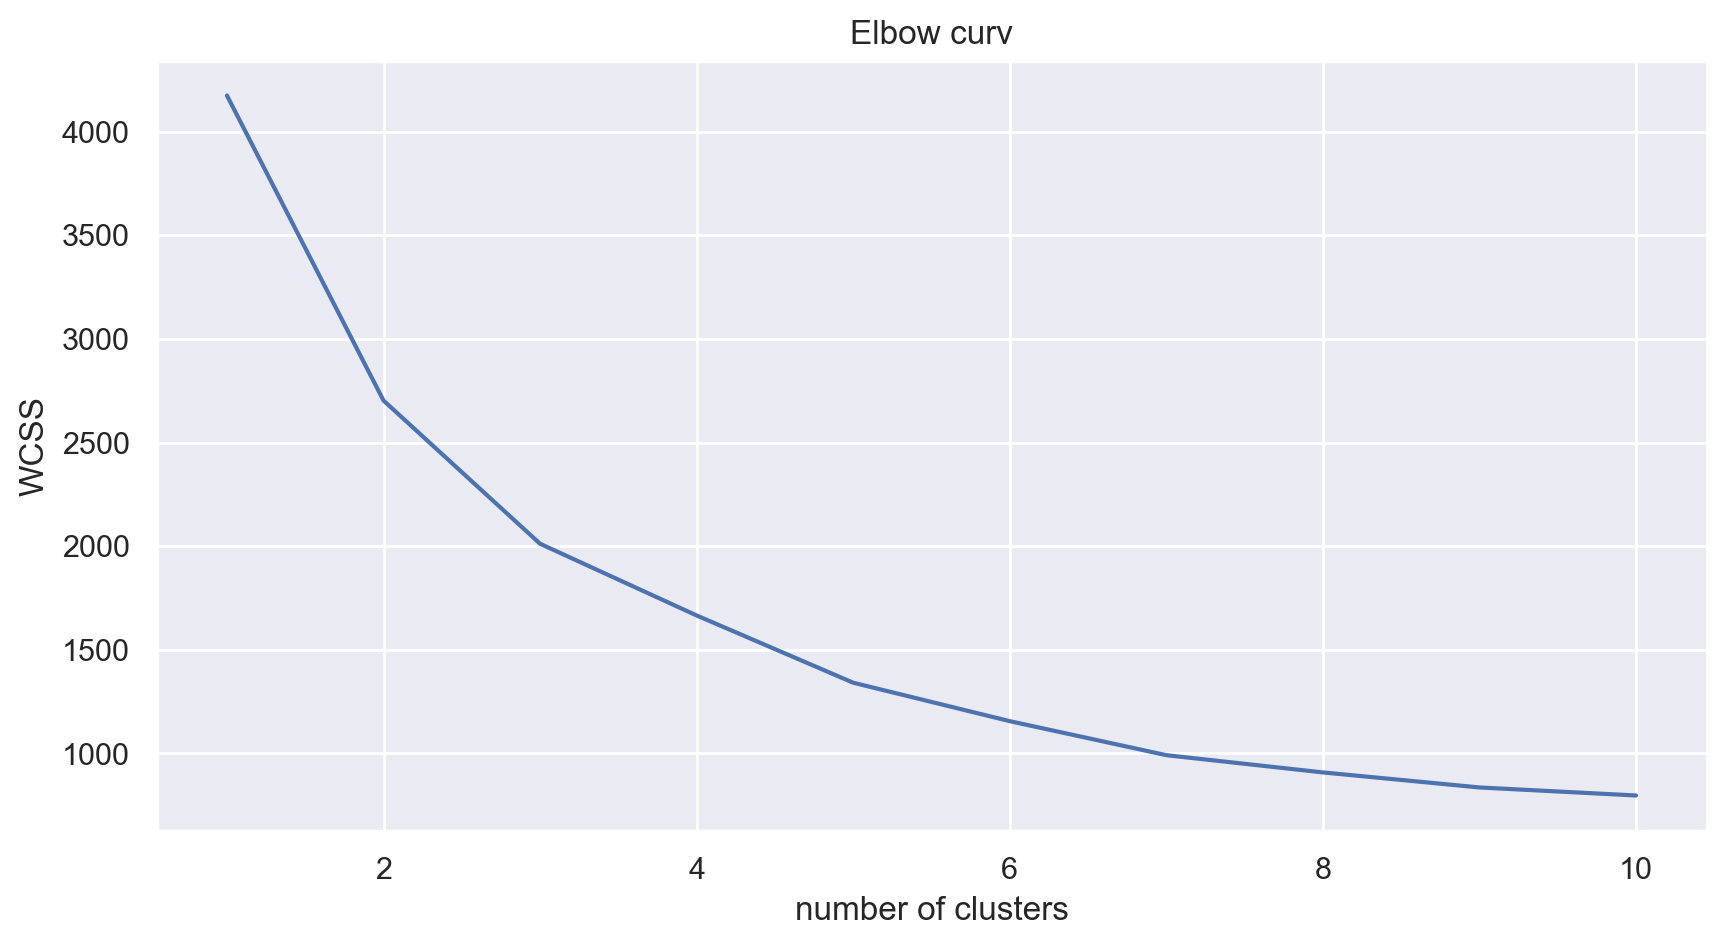

In [76]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(dt)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
model=KMeans(n_clusters=5)
model.fit(dt)
model.labels_

array([0, 0, 0, ..., 2, 1, 0])

In [71]:
df['Cluster']=y
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
ID#,,,,,,,,,,,,
1,28143.0,0,1,1,1,174.00,1,0.0,0.0,7000,0,1
2,19244.0,0,1,1,1,215.00,2,0.0,0.0,6968,0,1
3,41354.0,0,1,1,1,4123.00,4,0.0,0.0,7034,0,1
4,14776.0,0,1,1,1,500.00,1,0.0,0.0,6952,0,1
5,97752.0,0,4,1,1,35075.75,26,466.5,1.5,6935,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476.0,0,1,1,1,8525.00,4,200.0,1.0,1403,1,3
4018,64385.0,0,1,1,1,981.00,5,0.0,0.0,1395,1,0
4019,73597.0,0,3,1,1,25447.00,8,0.0,0.0,1402,1,5


In [72]:
df.iloc[:,0:4].groupby(df.Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles
Cluster,,,,
0,36038.368622,0.0,1.540816,1.000000
1,27211.060172,0.0,1.068052,1.000000
2,93353.650000,0.0,3.466667,1.000000
3,61838.440337,0.0,1.146413,1.000000
4,90576.447793,0.0,3.166384,1.000000
5,69311.377027,0.0,3.900000,1.000000
6,48829.331395,0.0,1.139535,2.348837
7,93763.208415,0.0,3.814090,1.000000


In [78]:
# DBScan

In [79]:
from sklearn.cluster import DBSCAN

In [80]:
df1=pd.read_csv('C:\\Users\\Abhishek\\Downloads\\EastWestAirline.csv',encoding='latin1',index_col=0)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc = StandardScaler()
x = sc.fit_transform(df1)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [84]:
db = DBSCAN(eps=0.5,min_samples=5)
y = db.fit_predict(x)
y

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

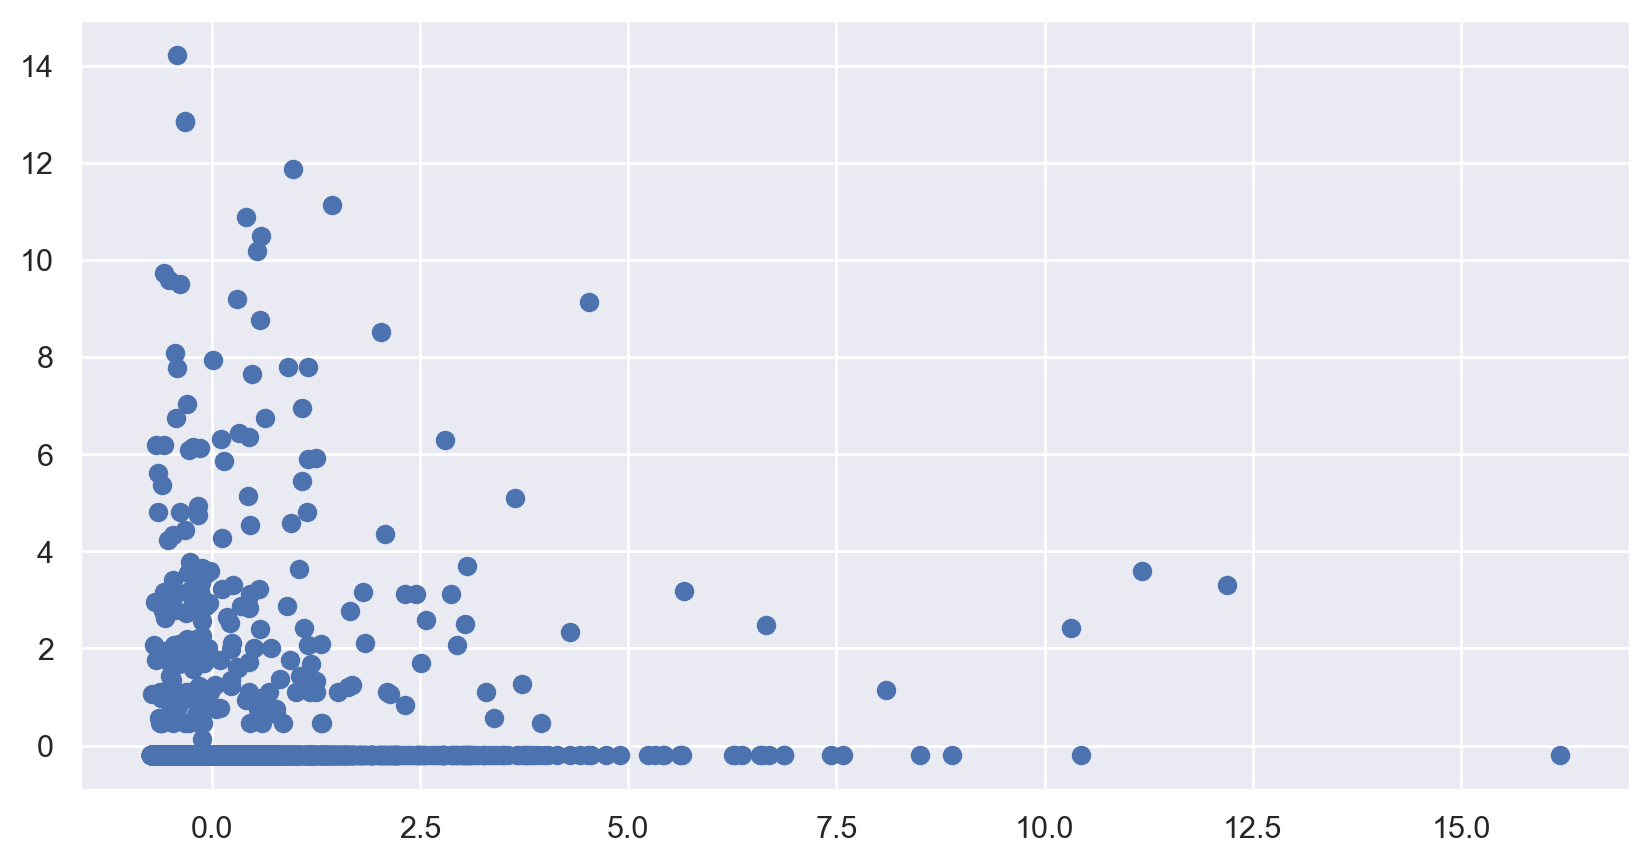

In [85]:
plt.scatter(x[:,0],x[:,1])

In [86]:
from sklearn.neighbors import NearestNeighbors

In [87]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [88]:
pd.DataFrame(d)

,0,1,2
0,0.0,0.111847,0.120342
1,0.0,0.114063,0.114376
2,0.0,0.165402,0.194589
3,0.0,0.048375,0.058575
4,0.0,0.545493,0.735055
...,...,...,...
3994,0.0,0.288941,0.335142
3995,0.0,0.312801,0.343099
3996,0.0,0.166148,0.280243
3997,0.0,0.257255,0.271674


In [90]:
dist = np.sort(d[:,1])

Text(0, 0.5, 'Epsilion value')

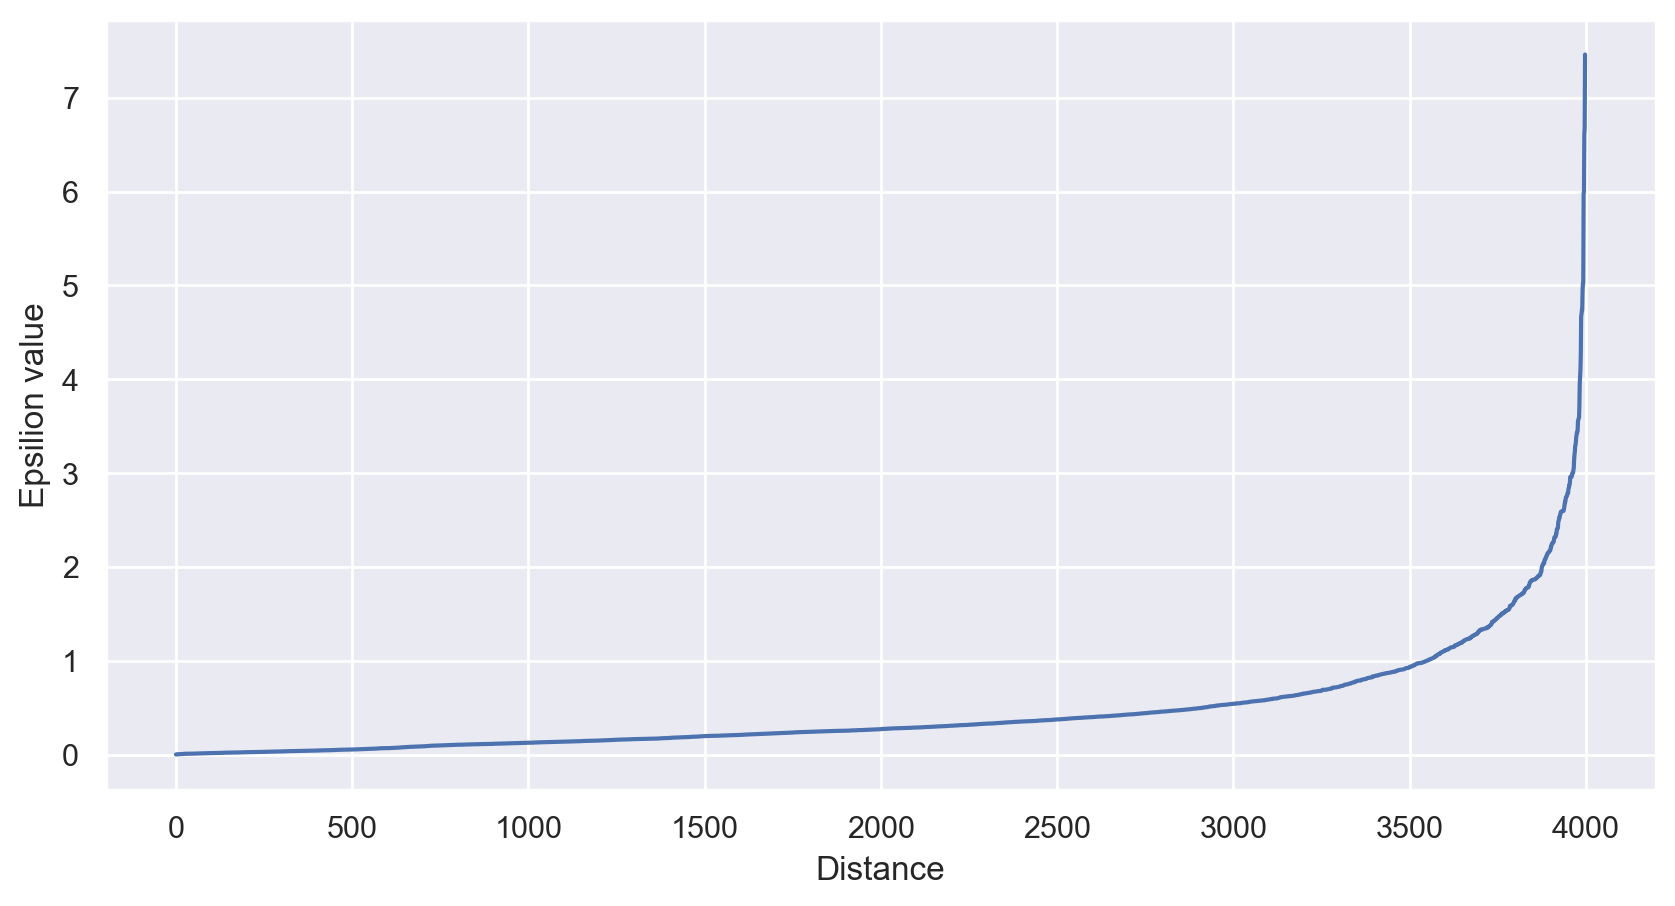

In [91]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilion value')

In [92]:
db = DBSCAN(eps=2,min_samples=11)
y = db.fit_predict(x)

In [95]:
df1['cluster'] = y
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [98]:
df1['cluster'].value_counts()

 0    2441
 1    1302
-1     240
 2      16
Name: cluster, dtype: int64

In [100]:
cluster_mean = df1.groupby('cluster').mean()
cluster_mean

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
-1,225834.029167,1490.650000,2.675000,1.175,1.204167,47893.308333,25.491667,3325.745833,9.670833,4841.904167,0.745833
0,57639.963949,42.606719,1.695617,1.000,1.000000,9774.895535,8.886522,187.523966,0.547726,3812.687014,0.000000
1,75887.015361,87.983871,2.641321,1.000,1.000000,25391.933948,14.109063,445.843318,1.399386,4566.139785,1.000000
2,39218.500000,0.000000,1.000000,2.000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000
